In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/kaggle/input/netflix-stock-price-prediction/NFLX.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


In [5]:
df=df[['Date','Close']]
df

,Date,Close
0,2018-02-05,254.259995
1,2018-02-06,265.720001
2,2018-02-07,264.559998
3,2018-02-08,250.100006
4,2018-02-09,249.470001
...,...,...
1004,2022-01-31,427.140015
1005,2022-02-01,457.130005
1006,2022-02-02,429.480011
1007,2022-02-03,405.600006


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1009 non-null   object 
 1   Close   1009 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.9+ KB


In [9]:
import datetime

def str_to_datetime(s):
    split = s.split("-")
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

x = str_to_datetime('2018-02-05')
x

datetime.datetime(2018, 2, 5, 0, 0)

In [10]:
df['Date']=df['Date'].apply(str_to_datetime)
df['Date']

0      2018-02-05
1      2018-02-06
2      2018-02-07
3      2018-02-08
4      2018-02-09
          ...    
1004   2022-01-31
1005   2022-02-01
1006   2022-02-02
1007   2022-02-03
1008   2022-02-04
Name: Date, Length: 1009, dtype: datetime64[ns]

In [11]:
df.index=df.pop('Date')

In [12]:
df

,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


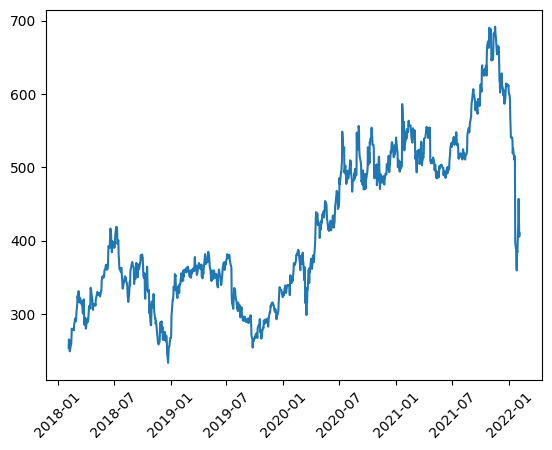

In [14]:
import matplotlib.pyplot as plt

plt.plot(df.index,df['Close'])
plt.xticks(rotation=45)
plt.show()

In [15]:
def window_data(data,n=3):
    windowed_data=pd.DataFrame()
    for i in range(n,0,-1):
        windowed_data[f'Target-{i}']=data['Close'].shift(i)
    windowed_data['Target']=data['Close']
    return windowed_data.dropna()

In [16]:
df=window_data(df)
df.head()

,Target-3,Target-2,Target-1,Target
Date,,,,
2018-02-08,254.259995,265.720001,264.559998,250.100006
2018-02-09,265.720001,264.559998,250.100006,249.470001
2018-02-12,264.559998,250.100006,249.470001,257.950012
2018-02-13,250.100006,249.470001,257.950012,258.269989
2018-02-14,249.470001,257.950012,258.269989,266.000000


In [22]:
def windowed_df_to_date_X_y(windowed_dataframe):
    
    df_as_np = windowed_dataframe.to_numpy()
#    dates = df_as_np.index()

    middle_matrix = df_as_np[:, :-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -1]

    return X.astype(np.float32), Y.astype(np.float32)

In [23]:
dates=df.index

In [24]:
X, y = windowed_df_to_date_X_y(df)
dates.shape, X.shape, y.shape

((1006,), (1006, 3, 1), (1006,))

In [25]:
dates

DatetimeIndex(['2018-02-08', '2018-02-09', '2018-02-12', '2018-02-13',
               '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-20',
               '2018-02-21', '2018-02-22',
               ...
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-31', '2022-02-01', '2022-02-02',
               '2022-02-03', '2022-02-04'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [26]:
X.shape

(1006, 3, 1)

In [27]:
y.shape

(1006,)

In [28]:
X

array([[[254.26],
        [265.72],
        [264.56]],

       [[265.72],
        [264.56],
        [250.1 ]],

       [[264.56],
        [250.1 ],
        [249.47]],

       ...,

       [[384.36],
        [427.14],
        [457.13]],

       [[427.14],
        [457.13],
        [429.48]],

       [[457.13],
        [429.48],
        [405.6 ]]], dtype=float32)

In [29]:
dates=np.array(dates)

In [30]:
print(dates)

['2018-02-08T00:00:00.000000000' '2018-02-09T00:00:00.000000000'
 '2018-02-12T00:00:00.000000000' ... '2022-02-02T00:00:00.000000000'
 '2022-02-03T00:00:00.000000000' '2022-02-04T00:00:00.000000000']


In [31]:
q_80=int(len(dates)*.8)
q_90=int(len(dates)*.9)

In [32]:
dates_train,X_train,y_train=dates[:q_80],X[:q_80],y[:q_80]

dates_val,X_val,y_val=dates[q_80:q_90],X[q_80:q_90],y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

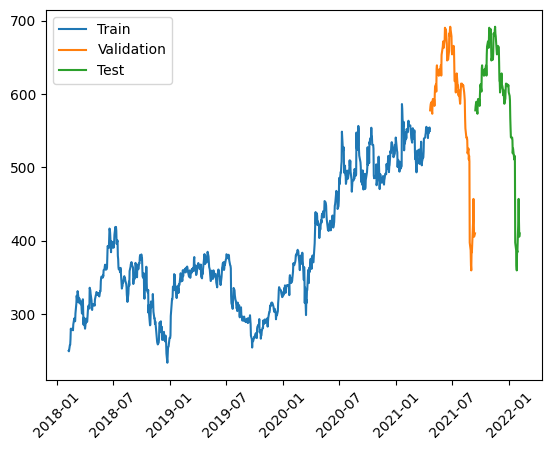

In [33]:
plt.plot(dates_train,y_train)
plt.plot(dates_val,y_test)
plt.plot(dates_test,y_test)

plt.xticks(rotation=45)
plt.legend(['Train','Validation','Test'])
plt.show()

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM,Dense

In [36]:
model=Sequential()

model.add(LSTM(72,input_shape=(3,1)))
model.add(Dense(32,'relu'))
model.add(Dense(16,'relu'))
model.add(Dense(8,'relu'))
model.add(Dense(4,'relu'))
model.add(Dense(1,'relu'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 72)             │        21,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,353 (95.13 KB)

 Trainable params: 24,353 (95.13 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error'])

In [41]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=120)

Epoch 1/120
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 157035.5469 - mean_absolute_error: 387.0439 - val_loss: 269711.7188 - val_mean_absolute_error: 518.5269
Epoch 2/120
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 154594.2500 - mean_absolute_error: 383.5381 - val_loss: 263336.8438 - val_mean_absolute_error: 512.3429
Epoch 3/120
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 147751.9531 - mean_absolute_error: 374.6563 - val_loss: 247696.5000 - val_mean_absolute_error: 496.8448
Epoch 4/120
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 134035.0625 - mean_absolute_error: 355.9348 - val_loss: 218586.6875 - val_mean_absolute_error: 466.6318
Epoch 5/120
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 107350.9844 - mean_absolute_error: 316.8275 - val_loss: 168287.5469 - val_mean_absolute_error: 409.1999
Epoch 6/120
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72988.5625 - mean_absolute_error: 254.8098 - val_loss: 101015.7266 - val_mean_absolute_error: 316.5030
Epoch 7/120
26/26 ━━━━

In [42]:
train_predictions=model.predict(X_train).flatten()

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


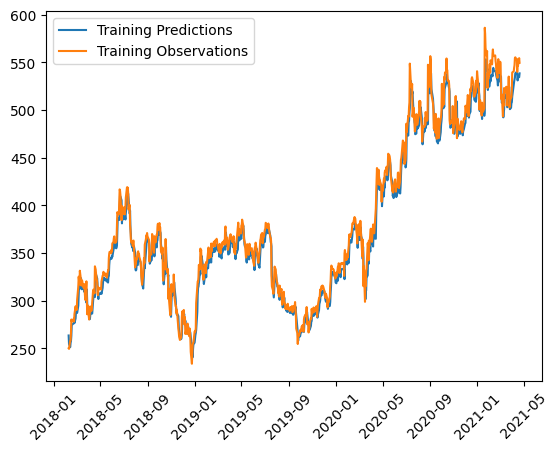

In [44]:
plt.plot(dates_train,train_predictions)
plt.plot(dates_train,y_train)

plt.xticks(rotation=45)
plt.legend(['Training Predictions','Training Observations'])
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


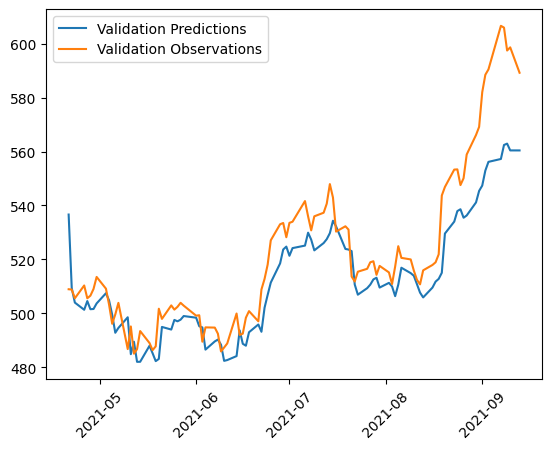

In [46]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)

plt.xticks(rotation=45)
plt.legend(['Validation Predictions', 'Validation Observations'])
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


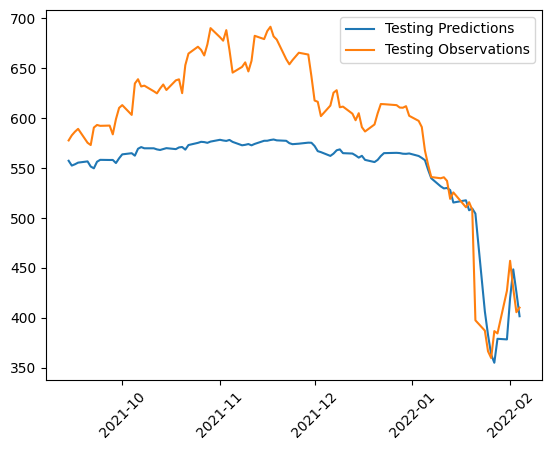

In [47]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)

plt.xticks(rotation=45)
plt.legend(['Testing Predictions', 'Testing Observations'])
plt.show()

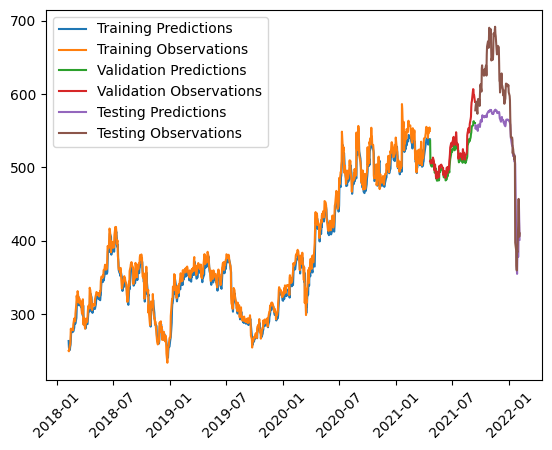

In [48]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)

plt.xticks(rotation=45)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])
plt.show()